In [1]:
import pandas as pd

In [2]:
import numpy as np
import pandas as pd
import pathlib
import time
import matplotlib.pyplot as plt

In [3]:
'{{:.{prec}f}}'.format(prec=4).format(3.123456)

'3.1235'

In [4]:
prec=3
value = 3.123456
f'{{value}:.{prec}}'

SyntaxError: f-string: single '}' is not allowed (144642880.py, line 3)

In [ ]:
str(1)

In [ ]:
for i in range(1, 14):
    print(i)

In [ ]:
f"t={str(1)}"

In [ ]:
'{{:.{prec}f}}'.format(prec=3)

In [ ]:
"{:.3f}".format(3.333333)

In [ ]:
f"{\"Eric Idle\"}"

In [ ]:
a = {"a": "albert", "b": "boris", "c": "christian"}

In [ ]:
def f(x, y, z):
    return x + y + z

In [ ]:
f(a)

In [ ]:
b = a.copy()

In [ ]:
b["4"] = "doris"

In [ ]:
a = ["one", "two", "three"]

In [ ]:
a.append("four")

In [ ]:
test = ("a", "b")

In [ ]:
test = ["abc", "b", "c"]

In [ ]:
ls = []

In [ ]:
ls += test

In [ ]:
ls

In [ ]:
a, b = *test

In [ ]:
test = pd.DataFrame([a])

In [ ]:
test.reindex(columns=[1, 3])

In [26]:
# Set path
path = pathlib.Path(r"C:\Users\Mathiass\OneDrive - Universität Zürich UZH\Documents\mt_literature\data")

In [27]:
# read dataset
data = pd.read_parquet(path/"final_df_call_cao_small.parquet")

In [28]:
# # # create smaller dataset to parquet
# X_1 = data.iloc[:, :19]
# X_2 = data[["cp_flag_C", "cp_flag_P"]]
# y = data["option_ret"]
# test = pd.concat([X_1, X_2, y], axis=1)
# test.to_parquet(fr"{path}\final_df_filledmean_small.parquet")

In [29]:
# FEATURE ENGINEERING
# Bid-Ask-Spread
data["best_bid"] = (data["best_offer"] - data["best_bid"]) / (data["best_offer"])
data = data.rename(columns={"best_bid": "ba_spread_option"}).drop(["best_offer"], axis=1)

# Gamma -> multiply by spotprice and divide by 100
data["gamma"] = data["gamma"] * data["spotprice"] / 100 #following Bali et al. (2021)

# Theta -> scale by spotprice
data["theta"] = data["theta"] / data["spotprice"] #following Bali et al. (2021)

# Vega -> scale by spotprice
data["vega"] = data["vega"] / data["spotprice"] #following Bali et al. (2021)

# Time to Maturity -> scale by number of days in year -> 365
data["days_to_exp"] = data["days_to_exp"] / 365

# Moneyness
data["strike_price"] = data["strike_price"] / data["spotprice"] # K / S
data = data.rename(columns={"strike_price": "moneyness"})

# Forward Price ratio
data["forwardprice"] = data["forwardprice"] / data["spotprice"]

# drop cf_adj + days no trading
data = data.drop(["cfadj", "days_no_trading", "spotprice", "adj_spot"], axis=1)


KeyError: 'best_offer'

In [ ]:
data.describe()

In [ ]:
# # multiclass y label function
# def binary_categorize(x):
#     if x > 0:
#         return 1
#     else:
#         return 0

# # apply label function to option returns
# data["option_ret"] = data["option_ret"].apply(binary_categorize)

# data[data["cp_flag_C"] == 0]["option_ret"].plot(kind="hist")

# data[data["cp_flag_C"] == 1]["option_ret"].plot(kind="hist")

# data["option_ret"].plot(kind="hist")

# def percent_one(x):
#     return np.sum(x) / len(x)

# percent_one(data[data["cp_flag_C"] == 1]["option_ret"])

# percent_one(data[data["cp_flag_P"] == 1]["option_ret"])

In [ ]:
# drop large outlier

# to_drop = []


# to_drop += (list(np.where(data["moneyness"] > np.percentile(data["moneyness"], 99))[0]))
# to_drop += (list(np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0]))
# to_drop += (list(np.where(data["volume"] > np.percentile(data["volume"], 99))[0]))
# to_drop += (list(np.where(data["open_interest"] > np.percentile(data["open_interest"], 99))[0]))

# data = data.drop(set(to_drop)).reset_index(drop=True)

In [ ]:
data

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tscv = TimeSeriesSplit(n_splits=17)

In [ ]:
for train, test in tscv.split(data):
    print("%s %s" % (train, test))

In [ ]:
data[:212415]

In [ ]:
# # DROP MONEYNESS BELOW 0.8 AND ABOVE 1.2
# to_drop = []


# to_drop += (list(np.where((data["moneyness"] > 1.2) | (data["moneyness"] < 0.8))[0]))
# data = data.drop(set(to_drop)).reset_index(drop=True)

In [30]:
# # take log of features where distribution is skewed
# # data["moneyness"] = np.log(data["moneyness"])
# data["ba_spread_option"] = np.log(data["ba_spread_option"])
# data["volume"] = np.log(data["volume"])
# data["open_interest"] = np.log(data["open_interest"])
# data["impl_volatility"] = np.log(data["impl_volatility"])
# # data["days_to_exp"] = np.log(data["days_to_exp"])
# data["mid_price"] = np.log(data["mid_price"])

# # data["forwardprice"] = np.log(data["forwardprice"])
# # data["ir_rate"] = np.log(data["ir_rate"])

In [31]:
data

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
0,1996-01-31,1.081081,0.160000,4,96,0.185437,0.315673,0.028479,0.238400,-0.064215,0.468493,1.4375,-0.028955
1,1996-01-31,1.025641,0.137931,23,134,0.244550,0.464967,0.030342,0.213110,-0.113202,0.295890,1.6875,-0.011522
2,1996-01-31,1.142857,0.250000,10,3830,0.453317,0.345315,0.014950,0.197803,-0.169347,0.295890,0.4375,0.130158
3,1996-01-31,0.944882,0.100000,5,254,0.324523,0.657941,0.018036,0.225074,-0.123758,0.391781,3.5625,0.008158
4,1996-01-31,0.944882,0.085714,2,4,0.312125,0.650623,0.014612,0.288712,-0.097742,0.641096,4.1875,-0.005763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766519,2021-10-31,0.936330,0.111111,30,5642,0.343540,0.672280,0.023547,0.170486,-0.139916,0.230137,1.2750,-0.012879
766520,2021-10-31,1.048689,0.166667,39,3039,0.336500,0.393872,0.023889,0.183325,-0.135840,0.230137,0.5500,-0.012664
766521,2021-10-31,0.898876,0.097561,83,349,0.374323,0.691910,0.014517,0.226750,-0.102782,0.457534,1.9500,-0.043857
766522,2021-10-31,1.048689,0.285714,12,1919,0.348393,0.441325,0.017001,0.263165,-0.103916,0.457534,0.9000,-0.021832


In [32]:
np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0]

array([   125,    492,   1216, ..., 766476, 766485, 766517], dtype=int64)

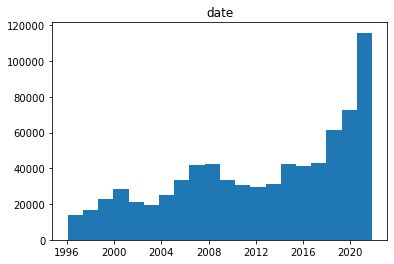

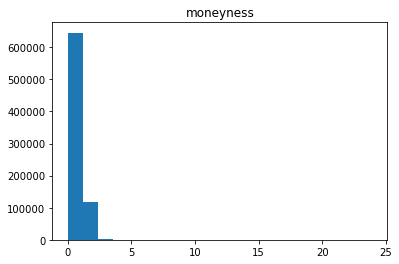

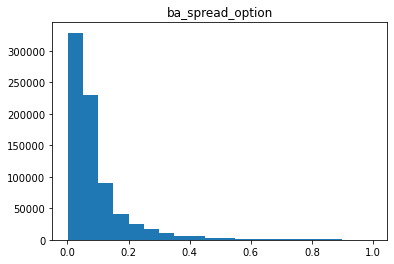

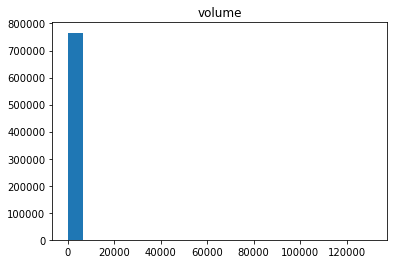

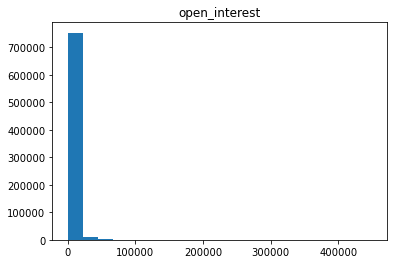

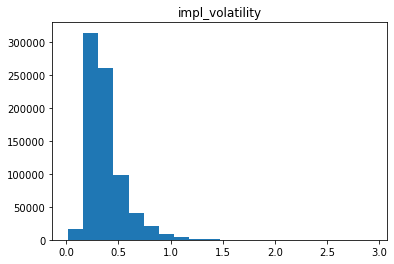

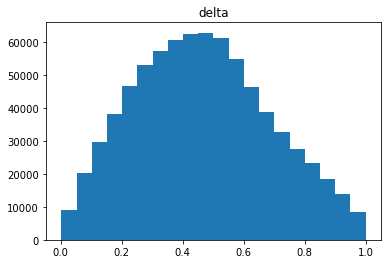

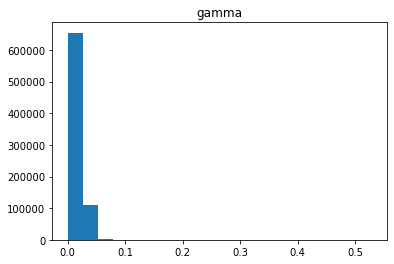

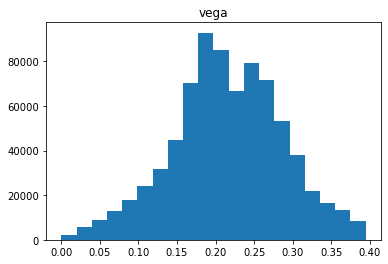

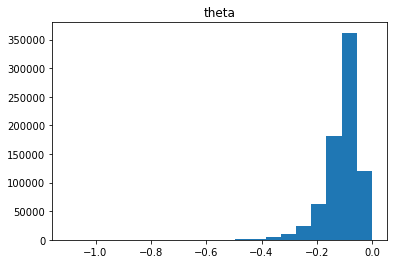

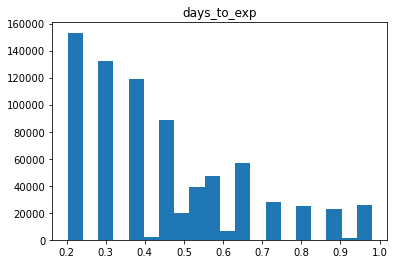

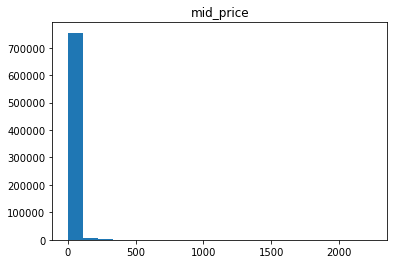

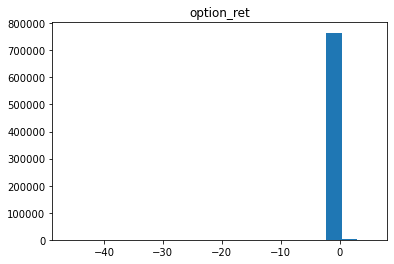

In [33]:
# Plot each column
for i in data.columns:
    plt.figure()
    plt.hist(data[i], bins=20)
    plt.title(i)

<AxesSubplot:ylabel='Frequency'>

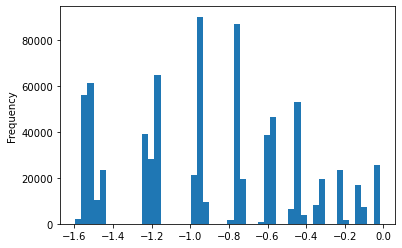

In [34]:
np.log(data["days_to_exp"]).plot(kind="hist", bins=50)

In [35]:
data.drop(np.where(data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99))[0])

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
0,1996-01-31,1.081081,0.160000,4,96,0.185437,0.315673,0.028479,0.238400,-0.064215,0.468493,1.4375,-0.028955
1,1996-01-31,1.025641,0.137931,23,134,0.244550,0.464967,0.030342,0.213110,-0.113202,0.295890,1.6875,-0.011522
2,1996-01-31,1.142857,0.250000,10,3830,0.453317,0.345315,0.014950,0.197803,-0.169347,0.295890,0.4375,0.130158
3,1996-01-31,0.944882,0.100000,5,254,0.324523,0.657941,0.018036,0.225074,-0.123758,0.391781,3.5625,0.008158
4,1996-01-31,0.944882,0.085714,2,4,0.312125,0.650623,0.014612,0.288712,-0.097742,0.641096,4.1875,-0.005763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766519,2021-10-31,0.936330,0.111111,30,5642,0.343540,0.672280,0.023547,0.170486,-0.139916,0.230137,1.2750,-0.012879
766520,2021-10-31,1.048689,0.166667,39,3039,0.336500,0.393872,0.023889,0.183325,-0.135840,0.230137,0.5500,-0.012664
766521,2021-10-31,0.898876,0.097561,83,349,0.374323,0.691910,0.014517,0.226750,-0.102782,0.457534,1.9500,-0.043857
766522,2021-10-31,1.048689,0.285714,12,1919,0.348393,0.441325,0.017001,0.263165,-0.103916,0.457534,0.9000,-0.021832


In [36]:
data

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
0,1996-01-31,1.081081,0.160000,4,96,0.185437,0.315673,0.028479,0.238400,-0.064215,0.468493,1.4375,-0.028955
1,1996-01-31,1.025641,0.137931,23,134,0.244550,0.464967,0.030342,0.213110,-0.113202,0.295890,1.6875,-0.011522
2,1996-01-31,1.142857,0.250000,10,3830,0.453317,0.345315,0.014950,0.197803,-0.169347,0.295890,0.4375,0.130158
3,1996-01-31,0.944882,0.100000,5,254,0.324523,0.657941,0.018036,0.225074,-0.123758,0.391781,3.5625,0.008158
4,1996-01-31,0.944882,0.085714,2,4,0.312125,0.650623,0.014612,0.288712,-0.097742,0.641096,4.1875,-0.005763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766519,2021-10-31,0.936330,0.111111,30,5642,0.343540,0.672280,0.023547,0.170486,-0.139916,0.230137,1.2750,-0.012879
766520,2021-10-31,1.048689,0.166667,39,3039,0.336500,0.393872,0.023889,0.183325,-0.135840,0.230137,0.5500,-0.012664
766521,2021-10-31,0.898876,0.097561,83,349,0.374323,0.691910,0.014517,0.226750,-0.102782,0.457534,1.9500,-0.043857
766522,2021-10-31,1.048689,0.285714,12,1919,0.348393,0.441325,0.017001,0.263165,-0.103916,0.457534,0.9000,-0.021832


In [37]:
# take out outliers
np.where(data["moneyness"] > np.percentile(data["moneyness"], 99))[0]

array([   215,    708,    813, ..., 766457, 766458, 766459], dtype=int64)

In [38]:
# drop outliers
data[data["open_interest"] > np.percentile(data["open_interest"], 99)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
13785,1997-04-30,1.428571,0.166667,3100,42248,0.665912,0.169822,0.008164,0.117485,-0.189591,0.219178,0.34375,-0.235686
13787,1997-04-30,1.071429,0.038462,2991,38922,0.741491,0.503811,0.011561,0.185601,-0.340831,0.219178,1.59375,-0.095037
13845,1997-04-30,1.101587,0.074074,1000,36773,0.349452,0.440637,0.013251,0.326998,-0.102687,0.717808,3.25000,-0.006174
13847,1997-04-30,1.269841,0.200000,48,33198,0.355001,0.269622,0.010974,0.274826,-0.082940,0.717808,1.68750,0.020664
14804,1997-05-31,1.022727,0.100000,178,35169,0.405125,0.512585,0.017808,0.217773,-0.171658,0.309589,3.56250,0.036367
...,...,...,...,...,...,...,...,...,...,...,...,...,...
765247,2021-10-31,0.718133,0.011461,8,31406,0.650491,0.864391,0.006049,0.120636,-0.128833,0.306849,347.00000,0.000875
765529,2021-10-31,0.918611,0.016949,121,30476,0.314367,0.739109,0.021541,0.155832,-0.107498,0.230137,5.85000,-0.015488
765545,2021-10-31,1.010472,0.016949,425,36904,0.305144,0.501852,0.027244,0.191398,-0.127588,0.230137,2.92500,-0.021468
765712,2021-10-31,1.081682,0.015000,5079,36088,0.317622,0.331275,0.023799,0.174007,-0.120552,0.230137,9.92500,0.021537


In [39]:
IQA = np.percentile(data["ba_spread_option"], 75) - np.percentile(data["ba_spread_option"], 25)

In [40]:
data[data["ba_spread_option"] > 5 * IQA]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
111,1996-01-31,1.600000,0.500000,10,765,0.569547,0.170583,0.006526,0.172965,-0.113187,0.468493,0.28125,0.079779
114,1996-01-31,1.250000,0.400000,4,135,0.282184,0.166407,0.012974,0.170334,-0.059534,0.468493,0.25000,-0.043070
125,1996-01-31,1.157895,0.666667,1,440,0.278676,0.162787,0.018977,0.114307,-0.081869,0.219178,0.25000,-0.281362
215,1996-01-31,2.025316,0.400000,20,2836,0.487428,0.128368,0.004382,0.206084,-0.057212,0.967123,0.50000,0.099182
276,1996-01-31,1.628959,0.428571,6,693,0.470010,0.093931,0.005216,0.113952,-0.061869,0.468493,0.34375,0.050313
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766458,2021-10-31,2.027751,0.405941,42,606,0.674424,0.021561,0.001595,0.024767,-0.036327,0.230137,0.80500,-0.100079
766476,2021-10-31,1.250670,0.750000,13,10643,0.286517,0.049109,0.007385,0.048679,-0.030389,0.230137,0.15000,-0.006185
766485,2021-10-31,1.206003,0.556650,15,2036,0.303014,0.215573,0.012387,0.226695,-0.057305,0.632877,1.46500,0.002434
766487,2021-10-31,1.066049,0.453125,2,2,0.274018,0.412290,0.017958,0.307097,-0.068240,0.632877,2.47500,-0.049771


In [41]:
np.percentile(data["ba_spread_option"], 99.99)

0.9782608695652175

In [42]:
data[data["ba_spread_option"] > np.percentile(data["ba_spread_option"], 99.99)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
261197,2008-09-30,1.808786,0.981481,10,406,0.903624,0.166786,0.005066,0.135420,-0.211812,0.298630,1.375,0.197179
394904,2014-03-31,1.484729,0.980769,15,21,0.664909,0.134929,0.006930,0.102310,-0.153444,0.224658,1.325,-0.058717
419738,2015-01-31,1.555786,0.989691,2,330,0.282347,0.066466,0.004672,0.126479,-0.018853,0.958904,0.490,0.114990
518054,2017-12-31,1.113204,0.983333,1,1423,0.137360,0.078996,0.019603,0.080526,-0.019788,0.306849,0.305,0.065196
531694,2018-03-31,1.265217,0.981818,10,30,0.238986,0.117762,0.011044,0.147413,-0.034022,0.558904,1.400,0.019115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704632,2021-02-28,1.327769,0.984848,1,77,0.358069,0.185573,0.009409,0.213324,-0.060599,0.632877,1.340,0.097466
704781,2021-02-28,1.450151,0.995327,4,32,0.368531,0.042027,0.004396,0.049731,-0.029909,0.306849,1.075,0.110451
713928,2021-03-31,1.315179,0.992806,2,24,0.339231,0.169225,0.009379,0.200094,-0.054228,0.638356,1.400,0.062776
716223,2021-03-31,1.201701,0.979167,1,497,0.188196,0.141102,0.013259,0.199946,-0.023727,0.810959,1.225,-0.087247


In [43]:
data["theta"].describe()

count    766524.000000
mean         -0.107108
std           0.061677
min          -1.100684
25%          -0.131665
50%          -0.093659
75%          -0.066433
max          -0.000643
Name: theta, dtype: float64

<AxesSubplot:ylabel='Frequency'>

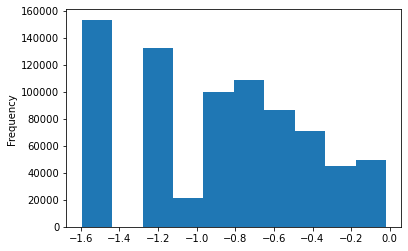

In [44]:
np.log(data["days_to_exp"]).plot(kind="hist")

In [45]:
data["moneyness"].describe()

count    766524.000000
mean          1.071438
std           0.221463
min           0.012602
25%           0.967889
50%           1.048532
75%           1.143368
max          23.916293
Name: moneyness, dtype: float64

In [46]:
np.percentile(data["moneyness"], 90)

1.2791358726549176

In [47]:
data[data["moneyness"] > 40]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret


In [48]:
data.describe()

,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
count,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000,766524.000000
mean,1.071438,0.091754,94.122394,2620.165558,0.371724,0.465496,0.017279,0.215396,-0.107108,0.450317,12.252915,-0.001931
std,0.221463,0.103934,560.381882,7100.937776,0.182217,0.221033,0.009281,0.072196,0.061677,0.202591,37.219444,0.137132
min,0.012602,0.000787,1.000000,1.000000,0.013138,0.002544,0.000008,0.000106,-1.100684,0.202740,0.040000,-46.160174
25%,0.967889,0.032787,5.000000,203.000000,0.251836,0.296927,0.010702,0.171365,-0.131665,0.295890,1.725000,-0.010827
50%,1.048532,0.058824,15.000000,705.000000,0.326909,0.455947,0.015806,0.214991,-0.093659,0.391781,3.850000,0.008719
75%,1.143368,0.108108,51.000000,2243.000000,0.436513,0.619540,0.022164,0.266398,-0.066433,0.558904,9.500000,0.027526
max,23.916293,0.996296,130924.000000,449713.000000,2.930194,0.999956,0.529508,0.394605,-0.000643,0.980822,2243.325000,5.475154


In [49]:
# def standardize(x):
#     return (x - np.mean(x)) / np.std(x)

# # Plot each column
# for i in data.columns[1:]:
#     plt.figure()
#     plt.hist(standardize(data[i]))
#     plt.title(i)

In [50]:
data[(data["option_ret"] > -0.5) & (data["option_ret"] < 2)]

,date,moneyness,ba_spread_option,volume,open_interest,impl_volatility,delta,gamma,vega,theta,days_to_exp,mid_price,option_ret
0,1996-01-31,1.081081,0.160000,4,96,0.185437,0.315673,0.028479,0.238400,-0.064215,0.468493,1.4375,-0.028955
1,1996-01-31,1.025641,0.137931,23,134,0.244550,0.464967,0.030342,0.213110,-0.113202,0.295890,1.6875,-0.011522
2,1996-01-31,1.142857,0.250000,10,3830,0.453317,0.345315,0.014950,0.197803,-0.169347,0.295890,0.4375,0.130158
3,1996-01-31,0.944882,0.100000,5,254,0.324523,0.657941,0.018036,0.225074,-0.123758,0.391781,3.5625,0.008158
4,1996-01-31,0.944882,0.085714,2,4,0.312125,0.650623,0.014612,0.288712,-0.097742,0.641096,4.1875,-0.005763
...,...,...,...,...,...,...,...,...,...,...,...,...,...
766519,2021-10-31,0.936330,0.111111,30,5642,0.343540,0.672280,0.023547,0.170486,-0.139916,0.230137,1.2750,-0.012879
766520,2021-10-31,1.048689,0.166667,39,3039,0.336500,0.393872,0.023889,0.183325,-0.135840,0.230137,0.5500,-0.012664
766521,2021-10-31,0.898876,0.097561,83,349,0.374323,0.691910,0.014517,0.226750,-0.102782,0.457534,1.9500,-0.043857
766522,2021-10-31,1.048689,0.285714,12,1919,0.348393,0.441325,0.017001,0.263165,-0.103916,0.457534,0.9000,-0.021832


In [51]:
# -> moved to data prep file
# data = data.drop(["secid", "optionid", "date", "exdate", "sdate", "edate", "permno"], axis=1)
# -> moved to data prep file. sort values by data! (optionally by secid -> but better to shuffle later)
# data = data.sort_values(["date", "secid"]).reset_index(drop=True)

In [52]:
# How many % missing values do we have?
np.sum(np.sum(data.isnull())) / (data.shape[0] * data.shape[1]) * 100

0.0

In [53]:
# takes a few mins
# data.corr()

In [54]:
# create X and y datasets
y = data["option_ret"]
# drop it for X
X = data.drop(["option_ret"], axis=1)

In [55]:
len(y[y > 0])

486529

In [56]:
1393098 / len(y)

1.817422546456471

In [57]:
# multiclass y label function
def binary_categorize(y):
    if y > 0:
        return 1
    else:
        return 0

In [58]:
# multiclass y label function
def multi_categorize(y):
    if y > 0.05:
        return 1
    elif y < -0.05:
        return -1
    else:
        return 0

In [59]:
# apply label function to option returns
y = y.apply(multi_categorize)

In [60]:
# from sklearn.model_selection import train_test_split

In [61]:
np.min(X["theta"])

-1.1006843537414968

In [62]:
# # Split into train, test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=False, random_state=0)
# # Split train into train and val
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, testsize=0.4, shuffle=False, random_state=0)

In [63]:
# define start years for validation and test periods
# start_train = 1996 (fixed)
start_val = "2015"
start_test = "2016"

In [64]:
# extract and save dates column -> needed to sort into train, val, test
dates = X["date"]
X = X.drop(["date"], axis=1)

In [65]:
# Create train, val, test sets & convert to numpy
# Train
X_train = X[dates < start_val].values
y_train = y[:len(X_train)].values

In [66]:
# Val
mask = (dates >= start_val) & (dates < start_test)
X_val = X[mask].values
y_val = y[len(X_train):len(X_train)+len(X_val)].values

In [67]:
# Test
X_test = X[dates >= start_test].values
y_test = y[-len(X_test):].values

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [69]:
# ONLY SCALE NON-DUMMY CONTINOUS VARIABLES
# scaler = ColumnTransformer(
#     [("scaler", StandardScaler(), slice(None, -2))],
#     remainder="passthrough"
# )

In [70]:
scaler = StandardScaler()
X_train_pca = scaler.fit_transform(X_train)

In [71]:
pca = PCA(n_components=10)

In [72]:
pca.fit(X_train_pca)

PCA(n_components=10)

Text(0, 0.5, 'cumulative expl. variance')

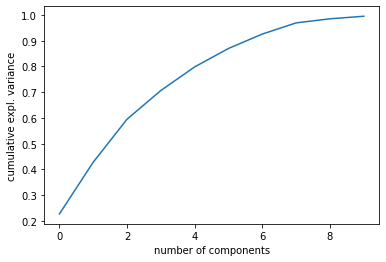

In [73]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of components")
plt.ylabel("cumulative expl. variance")

In [74]:
X_train.shape

(419568, 11)

In [75]:
pca = PCA(n_components=10)

In [76]:
scaler = StandardScaler()

In [77]:
clf = LogisticRegression(random_state=0, 
                         class_weight="balanced",
                           max_iter=1000,
#                          n_jobs=-1,
#                          C=0.0001,
                        )

# clf = RandomForestClassifier(random_state=0,
#                     class_weight="balanced",
#                     max_depth=2,
#                     n_jobs=-1,
#                 )

# clf = HistGradientBoostingClassifier(random_state=0,
#                                  max_iter=100000, 
#                                  max_depth=2,
# #                                  learning_rate=1.0,
#                                 validation_fraction=None,
#                                  verbose=1,
#                                 )

# clf = LinearSVC(random_state=0,
#                class_weight="balanced",
#                )

# clf = SVC(random_state=0,
#          class_weight="balanced",
#          )

In [78]:
len(X_train)

419568

In [79]:
clf = Pipeline([
    ('scaler', scaler),
#     ('pca' , pca),
    ('clf', clf),
])

In [80]:
# np.logspace(-2, 2, 5)

In [81]:
# train_indices = [[1,3,5,7,9],[2,4,6,8]]
# test_indices = [[2,4,6,8],[1,3,5,7,9]]

In [82]:
# a = zip(train_indices, test_indices)

In [83]:
# for i, y in a:
#     print(i, y)

In [84]:
# def cv_gen():
#     for i in range(3):
#         yield i, i*2

In [85]:
param_grid = {
#     "clf__C": np.logspace(-15, 0, 5),
#       "clf__max_depth": [2, 3, 4],
}
clf = GridSearchCV(
    clf, 
    param_grid,
    scoring=["accuracy", "balanced_accuracy"],
    refit="balanced_accuracy",
    n_jobs=-1,
#     cv=a,
    verbose=3,
)

In [86]:
# sample_weight
# sample_weight = 3 * (len(y_train) - np.sum(y_train)) / np.sum(y_train)

In [87]:
s_time = time.time()
clf.fit(X_train, y_train,
#        clf__sample_weight=sample_weight
       )
e_time = time.time()
print("Time to fit: ", (e_time - s_time), "seconds")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Time to fit:  7.933129787445068 seconds


In [88]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score

In [89]:
y_trivial = np.zeros_like(y_val)

In [90]:
pd.value_counts(y_val)

 0    27991
-1     2416
 1     1686
dtype: int64

In [91]:
np.mean(y_val)

-0.022746393294487896

##### Trivial prediction

In [92]:
# TRIVIAL prediction
accuracy_score(y_val, y_trivial)

0.8721839653506995

In [93]:
# TRIVIAL prediction
balanced_accuracy_score(y_val, y_trivial)

0.3333333333333333

#### Classifier prediction

In [94]:
# CLASSIFIER
y_pred = clf.predict(X_val)

In [95]:
# CLASSIFIER
accuracy_score(y_val, y_pred)

0.7639360608232325

In [96]:
# 0.54

In [97]:
# CLASSIFIER
balanced_accuracy_score(y_val, y_pred)

0.5252292882347883

In [98]:
# LR 0.5240759984109695
#RF 0.5263639414267005

In [99]:
# 0.52

In [100]:
pd.value_counts(y_pred)

 0    24518
-1     4300
 1     3275
dtype: int64

In [101]:
np.mean(y_pred)

-0.03193842894089054

In [102]:
np.sum(y_pred) / len(y_pred)

-0.03193842894089054

In [127]:
from sklearn.dummy import DummyClassifier

In [142]:
dummy_clf = DummyClassifier(strategy="uniform")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='uniform')

In [143]:
y_dummy = dummy_clf.predict(X_val)

In [144]:
accuracy_score(y_val, y_dummy)

0.336864736858505

In [145]:
balanced_accuracy_score(y_val, y_dummy)

0.3302881050377469

In [108]:
clf.cv_results_


{'mean_fit_time': array([3.08350477]),
 'std_fit_time': array([0.20510187]),
 'mean_score_time': array([0.07362938]),
 'std_score_time': array([0.0124867]),
 'params': [{}],
 'split0_test_accuracy': array([0.51035584]),
 'split1_test_accuracy': array([0.70202827]),
 'split2_test_accuracy': array([0.70119408]),
 'split3_test_accuracy': array([0.60066974]),
 'split4_test_accuracy': array([0.76682993]),
 'mean_test_accuracy': array([0.65621557]),
 'std_test_accuracy': array([0.09024168]),
 'rank_test_accuracy': array([1]),
 'split0_test_balanced_accuracy': array([0.52291524]),
 'split1_test_balanced_accuracy': array([0.59284658]),
 'split2_test_balanced_accuracy': array([0.51163225]),
 'split3_test_balanced_accuracy': array([0.5530884]),
 'split4_test_balanced_accuracy': array([0.52196062]),
 'mean_test_balanced_accuracy': array([0.54048862]),
 'std_test_balanced_accuracy': array([0.02961388]),
 'rank_test_balanced_accuracy': array([1])}

In [109]:
clf.best_params_

{}